<a href="https://colab.research.google.com/github/Narennnnn/DataSciFolio/blob/main/EduSenseSmartClusteringofStudentData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


In [11]:
dataField=pd.read_csv('student_clustering.csv')

In [12]:
# Standardize the CGPA and IQ columns
scaler = StandardScaler()
dataField[['cgpa', 'iq']] = scaler.fit_transform(dataField[['cgpa', 'iq']])

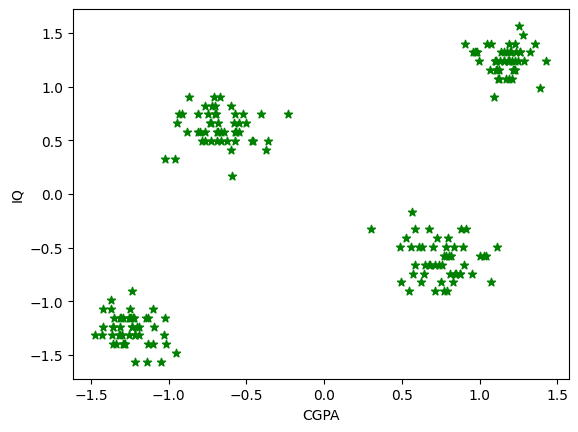

In [15]:
plt.scatter(dataField.cgpa,dataField.iq,marker='*',color='green')
plt.xlabel("CGPA")
plt.ylabel("IQ")
plt.show()

In [16]:
km=KMeans(n_clusters=4)
results=km.fit_predict(dataField[['cgpa','iq']])
dataField['Cluster']=results

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [24]:
clusters=[]
for cluster_id in range(4):
  clusters.append(dataField[dataField['Cluster']==cluster_id])


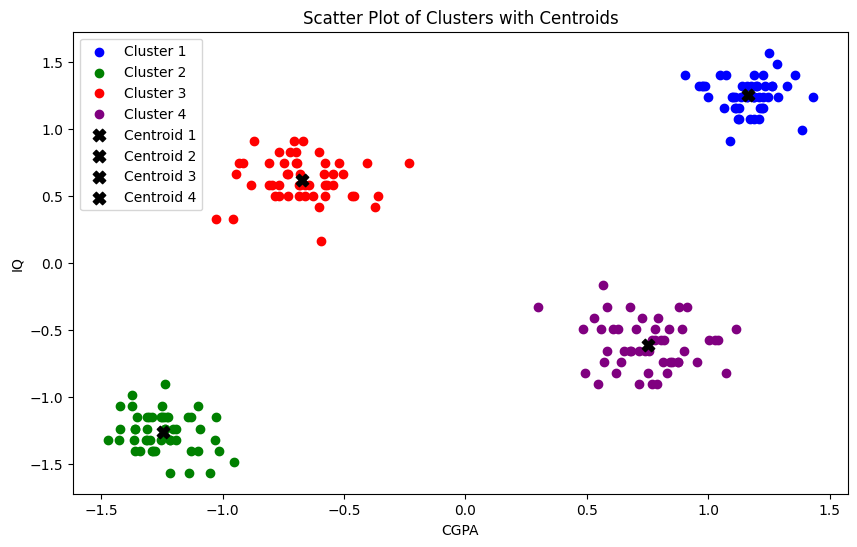

In [26]:
# Create a scatter plot for each cluster
plt.figure(figsize=(10, 6))
plt.title('Scatter Plot of Clusters with Centroids')
plt.xlabel('CGPA')
plt.ylabel('IQ')

colors = [
    'blue', 'green', 'red',
    'purple', 'orange',
]

# Plot the data points
for i, cluster_df in enumerate(clusters):
    plt.scatter(
        cluster_df['cgpa'], cluster_df['iq'], color=colors[i], label=f'Cluster {i + 1}'
    )

# Plot cluster centroids
centroids = km.cluster_centers_
for i, centroid in enumerate(centroids):
    plt.scatter(centroid[0], centroid[1], marker='X', color='black', s=80, label=f'Centroid {i + 1}')

plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

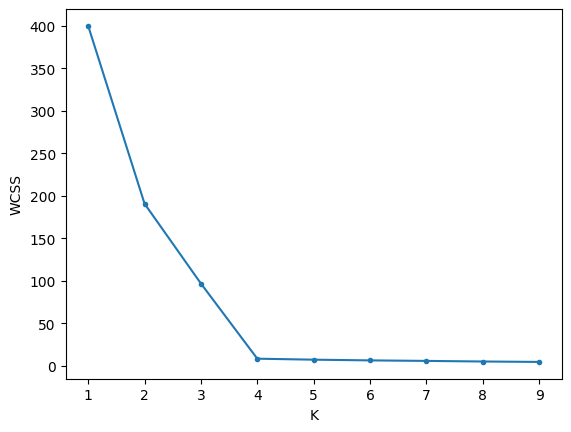

In [27]:
# Calculate Within-Cluster-Sum-of-Squares (WCSS) for different values of K
k_rng = range(1, 10)
wcss = []

for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(dataField[['cgpa', 'iq']])
    wcss.append(km.inertia_)

# Plot the Elbow Method
plt.plot(k_rng, wcss, marker='.')
plt.xlabel('K')
plt.ylabel('WCSS')
plt.show()
